# Jargon Distance --- Demonstration

In [1]:
import codecs
from nltk import word_tokenize, ngrams
from collections import Counter

In [3]:

fnames = ['./text_data/shakespeare/1786.txt.utf-8', './text_data/shakespeare/1793.txt.utf-8',
         './text_data/sawyer/74-0.txt', './text_data/sawyer/76-0.txt',
         './text_data/dickens/pg19337.txt', './text_data/dickens/pg730.txt']

# Full titles for the filenames:
groups = ['William Shakespeare - As You Like It', 'William Shakespeare - Othello', 
          'Mark Twain - The Adventures of Tom Sawyer', 'Mark Twain - The Adventures of Huckleberry Finn',
          'Charles Dickens - A Christmas Carol', 'Charles Dickens - Oliver Twist']


In [6]:
# You will need to uncomment and run the following to download data for the nltk library:

# nltk.download('punkt')

In [4]:
term_count_dict = {}  # mapping of filename -> term_counter
group_map = {}  # mapping of filename -> title
for i, fname in enumerate(fnames):
    with codecs.open(fname, 'r', encoding='utf8') as f:
        txt = f.read()
    txt = txt.lower()
    tokens = word_tokenize(txt)
    ng = ngrams(tokens, 1)
    term_counts = Counter(ng)
    term_count_dict[fname] = term_counts
    group_map[fname] = groups[i]

In [7]:
from jargon_distance import JargonDistance

In [8]:
# Create JargonDistance object and calculate jargon distance
j = JargonDistance(term_counts=term_count_dict, group_map=group_map)
j.calculate_jargon_distance()

### Visualize results

In [9]:
from jargon_distance.analysis import JargonDistanceAnalysis

In [12]:
ja = JargonDistanceAnalysis.from_object(j)

ja.symmetrize_graph()

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# ja.get_linkage(method='average')

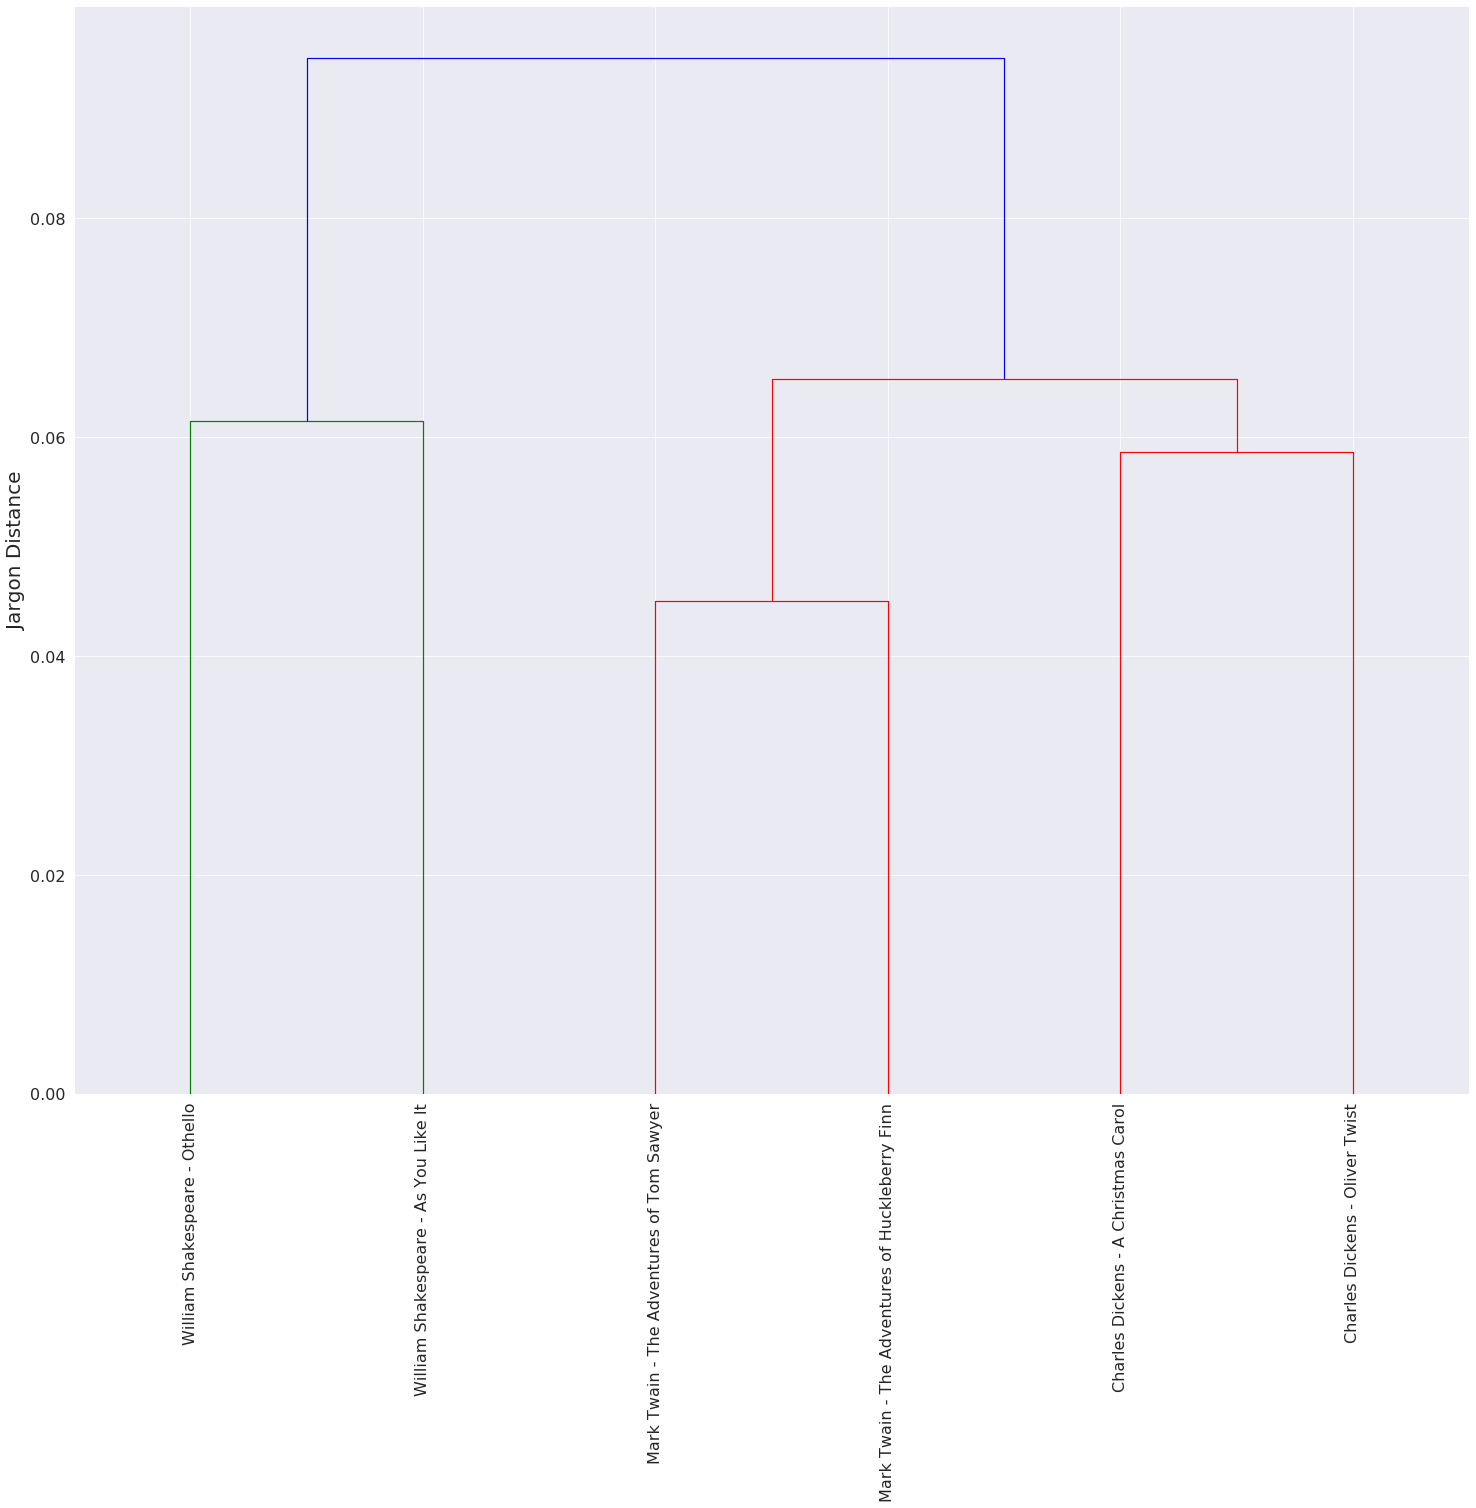

In [15]:
ja.make_dendrogram(labels=list(ja.G_sym.nodes()), show_plot=True, rotation=90.)

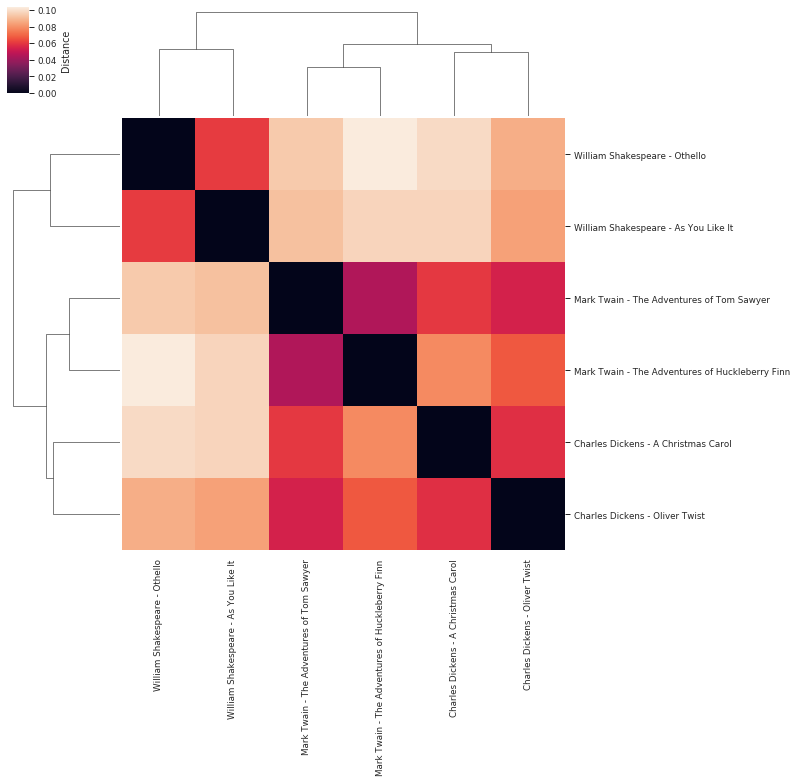

In [16]:
cm = ja.make_sns_clustermap(labels=ja.G_sym.nodes())
# plt.show()
# fig.show()